<a href="https://colab.research.google.com/github/2303A52126/AIML2303A52126/blob/main/AIMl_ASS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_table("/content/archive (12).zip",sep=',', index_col=0)
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   767 non-null    int64  
 1   BloodPressure             767 non-null    int64  
 2   SkinThickness             767 non-null    int64  
 3   Insulin                   767 non-null    int64  
 4   BMI                       767 non-null    float64
 5   DiabetesPedigreeFunction  767 non-null    float64
 6   Age                       767 non-null    int64  
 7   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 53.9 KB


In [ ]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
l=list(df.columns)
l[0:len(l)-2]

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction']

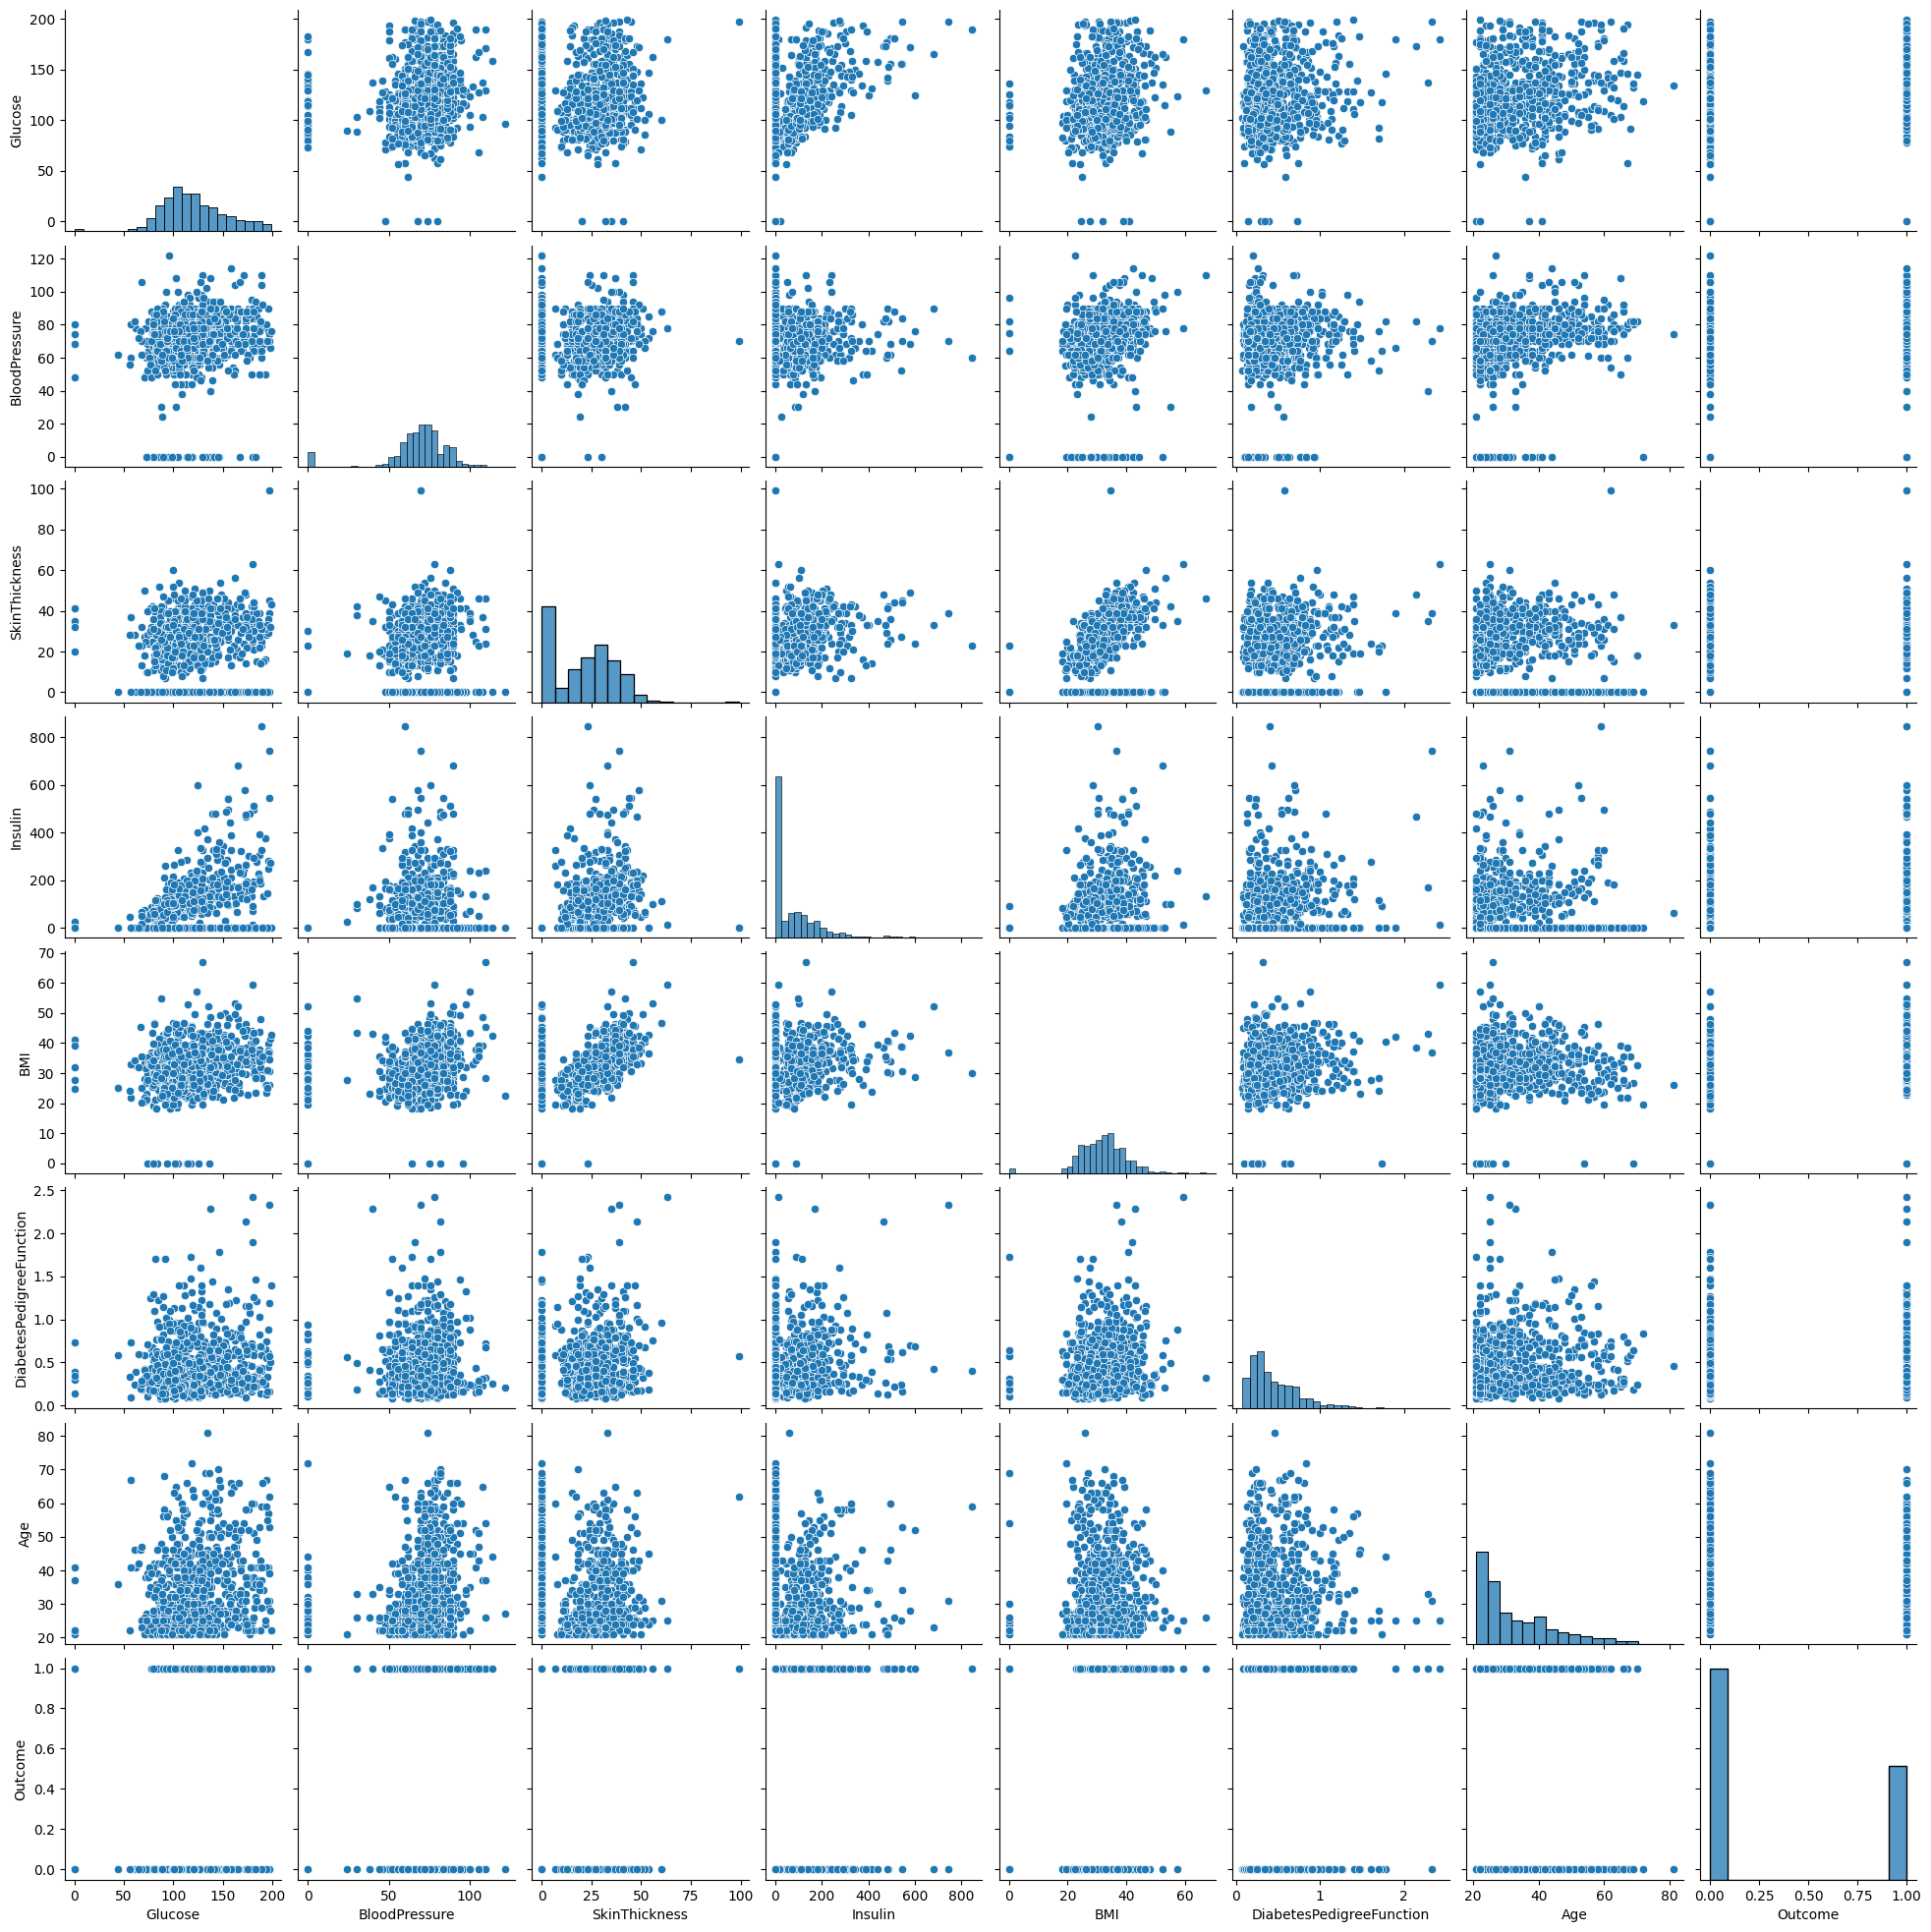

In [ ]:
sns.pairplot(df)

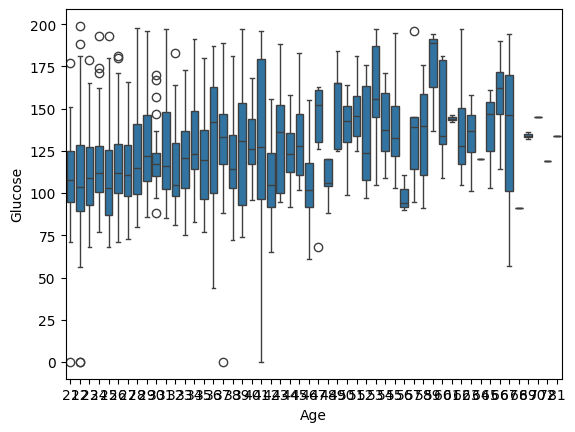

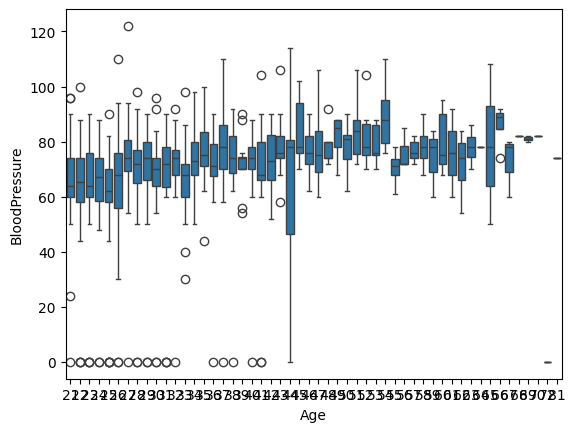

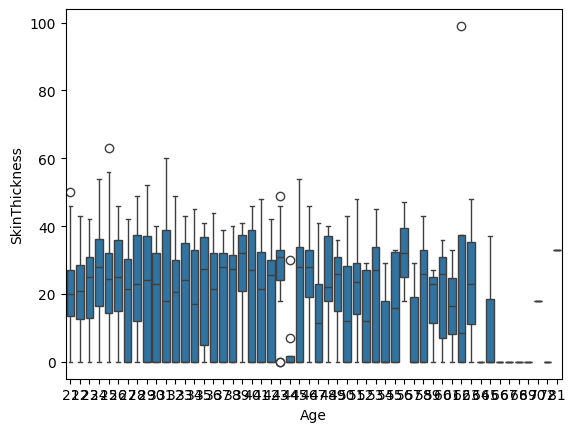

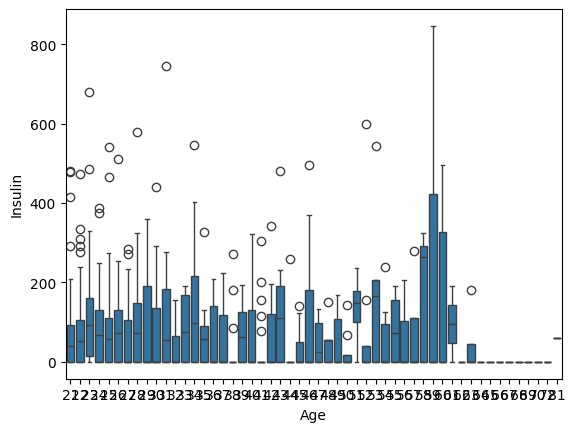

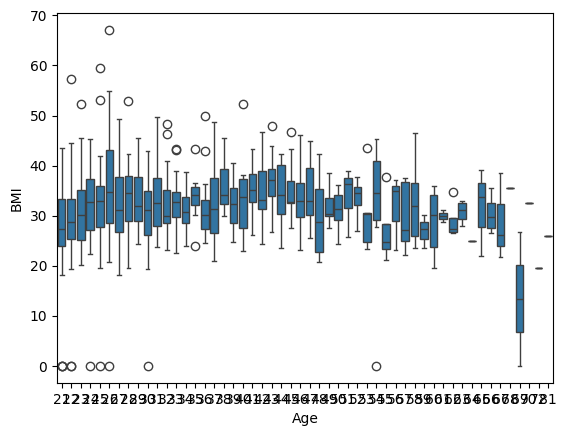

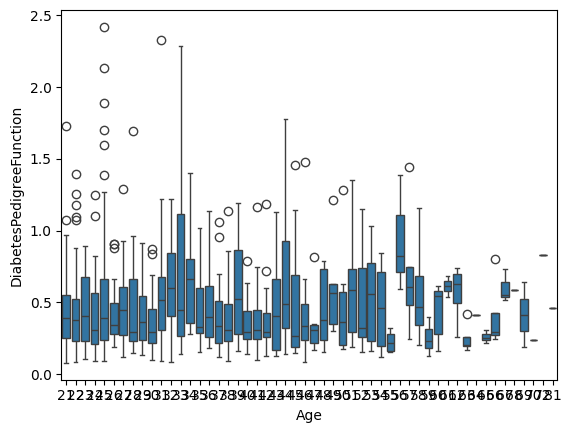

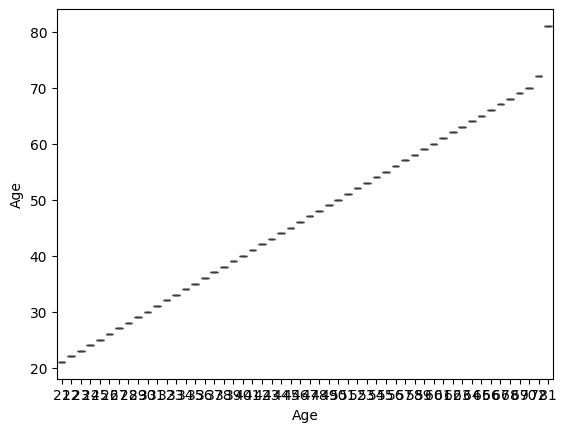

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(len(l)-1):
      sns.boxplot(x='Age',y=l[i], data=df)
      plt.figure()



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


scaler.fit(df.drop('Age', axis=1))


scaled_features = scaler.transform(df.drop('Age', axis=1))


In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.847055,0.149604,0.907789,-0.693559,0.203622,0.467638,1.364529
1,-1.124361,-0.160381,0.531560,-0.693559,-0.684258,-0.365494,-0.732853
2,1.942286,-0.263709,-1.286880,-0.693559,-1.102830,0.603475,1.364529
3,-0.999192,-0.160381,0.155331,0.122357,-0.493998,-0.920915,-0.732853
4,0.502839,-1.503649,0.907789,0.764674,1.408602,5.481522,1.364529


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd



X = df.drop('Age', axis=1)
y = df['Age']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


X_train shape: (536, 7), X_test shape: (231, 7)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[3 3 2 ... 0 0 0]
 [5 1 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          21       0.18      0.15      0.16        20
          22       0.04      0.06      0.05        17
          23       0.00      0.00      0.00         8
          24       0.00      0.00      0.00        14
          25       0.00      0.00      0.00        15
          26       0.14      0.08      0.11        12
          27       0.00      0.00      0.00         4
          28       0.29      0.18      0.22        11
          29       0.00      0.00      0.00         8
          30       0.00      0.00      0.00         9
          31       0.17      0.20      0.18         5
          32       0.00      0.00      0.00         6
          33       0.00      0.00      0.00         4
          34       0.00      0.00      0.00         6
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         8
          37       0.20      0.17      0.18         6
          38       0.07    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.957


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


print(y_pred)


[21 25 22 24 21 42 21 23 22 28 21 23 23 23 25 21 26 22 23 25 23 22 30 22
 29 23 22 22 24 22 24 43 29 28 28 24 22 23 23 25 39 28 25 22 32 26 21 24
 30 23 27 23 22 21 32 22 45 25 52 21 22 25 25 22 22 27 21 22 27 22 23 24
 31 22 28 28 21 23 25 31 33 22 21 22 26 39 26 21 22 22 21 21 22 22 33 21
 21 45 22 38 21 22 33 24 22 21 25 22 21 25 21 23 22 24 35 28 22 42 27 23
 21 29 35 23 22 22 22 33 29 23 29 23 21 38 22 23 27 44 25 21 25 23 22 27
 47 22 22 25 31 45 28 42 22 28 22 22 21 22 23 22 21 31 28 25 23 27 21 27
 31 24 33 21 24 22 25 21 21 23 21 27 21 23 21 24 25 21 27 26 31 23 21 22
 23 27 38 27 21 21 24 29 24 28 22 33 28 41 22 22 22 36 54 22 21 35 26 21
 31 29 44 29 31 24 23 21 33 23 21 23 26 24 21]


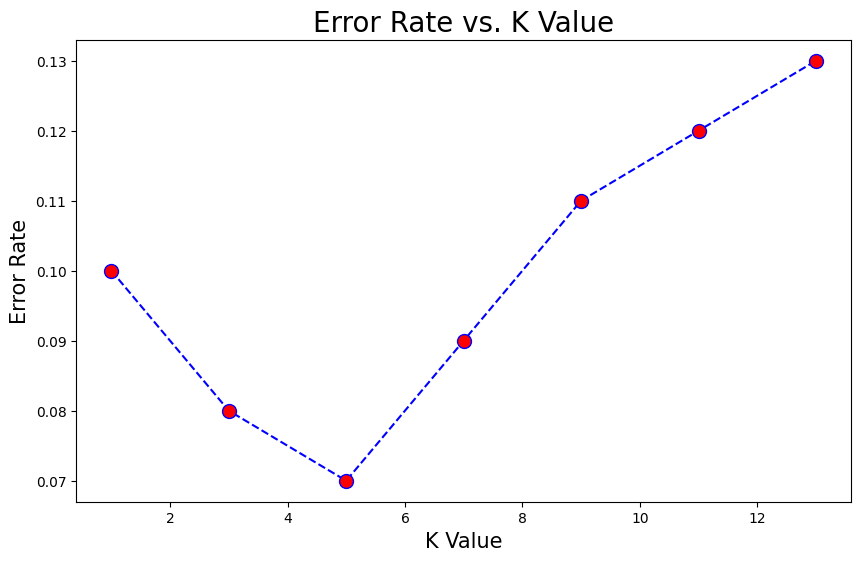

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


k_values = [1, 3, 5, 7, 9, 11, 13]
error_rates = [0.1, 0.08, 0.07, 0.09, 0.11, 0.12, 0.13]


plt.plot(k_values, error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)


plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K Value', fontsize=15)
plt.ylabel('Error Rate', fontsize=15)


plt.show()
